In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from PIL import Image, ImageOps

In [2]:
def AddImage(path):
  test_img = Image.open(path)

  test_img = test_img.resize((24,24))
  test_img = test_img.convert('L')
  '''plt.imshow(test_img, cmap = 'gray')
  plt.show()'''

  test_x = np.array(test_img, np.float32)
  test_x = test_x.reshape(-1,576)
  test_x = test_x / 255
  return test_x[0]

In [3]:
path = 'a.npy'
pathForBias = 'aBias.npy'
def SaveWeigthsInFile(path, network):
  np.save(path, network.BestWeights)

def SaveBiasWeightsInFile(path, network):
  np.save(path, network.BestBiasWeights)

def ReadWeigthFromFile(path):
  return np.load(path,allow_pickle=True)

In [4]:
def AddImageToArray(x, y,folderPath, y_sheme):
  for filename in os.listdir(folderPath):
    x.append(AddImage(os.path.join(folderPath, filename)))
    y.append(y_sheme)

In [5]:
def sigmoid(x):
    #Сигмоидная функция активации: f(x) = 1 / (1 + e^(-x))
    return 1 / (1 + np.exp(-x))
    #return 1 if x > 0 else 0

def dersigmoid(s):
  return sigmoid(s) * (1 - sigmoid(s))

In [107]:
class Neuron:
    def __init__(self, weights, bias =1, biasWigth = 1):
        self.Weights = weights
        self.DeltaWeights = np.zeros(len(weights))
        self.Bias = bias
        self.Beta = 0
        self.dW = 0
        self.dB = 0
        self.BiasWigth = biasWigth
    
    def feedforward(self, inputs):
        self.LastInput = inputs
        total = np.dot(self.Weights, inputs) + self.Bias * self.BiasWigth
        self.LastRezult = total
        return sigmoid(total)
    
    
    def WeightCorrection(self, lam, alpha):
      self.dW = alpha*self.dW + (1 - alpha) * np.square(self.Beta) 
      self.dB = alpha*self.dB + (1 - alpha) * np.square(self.Beta)
      
      self.Weights = self.Weights - np.dot(lam * self.Beta/(np.sqrt(self.dW) + 0.0001), self.LastInput)
      self.BiasWigth = self.BiasWigth - lam * self.Beta/(np.sqrt(self.dB) + 0.0001)
                

    

[[1.         1.         1.         ... 1.         1.         0.99215686]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 ...
 [0.85490197 0.85490197 0.8509804  ... 0.827451   0.8235294  0.8235294 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
Trains


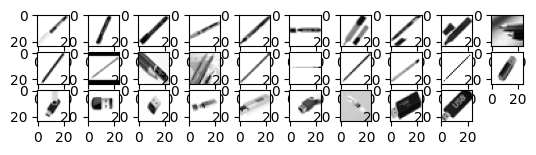

In [57]:
x = []
y = []

AddImageToArray(x,y,'Markers', [1,0,0])
AddImageToArray(x,y,'Pencils', [0,1,0])
AddImageToArray(x,y,'Flahs', [0,0,1])

#AddImageToArray(x,y,'/content/drive/My Drive/Neurons/Triangles', [1,0,0])
#AddImageToArray(x,y,'/content/drive/My Drive/Neurons/Squares', [0,1,0])
#AddImageToArray(x,y,'/content/drive/My Drive/Neurons/Circus', [0,0,1])
x = np.array(x)
y = np.array(y)
print(x)

print("Trains")
for i in range(len(x)):
  plt.subplot(10,10, i+1)
  plt.imshow(x[i].reshape(24,24), cmap='gray')
plt.show()

In [58]:
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
tsne = PCA(n_components=20)
print(x[0])
#x = tsne.fit_transform(x, y)
print(x[0])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.99215686 0.99215686 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.91764706 0.41960785 0.7882353  1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.8980392  0.34509805 0.20784314 0.5372549  1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.89411765 0.36078432 0.21568628 0.40392157 0.8901961  1.
 1.         1.         1.         1.         1.         

In [119]:
from audioop import avg

from numpy import average


alpha = 0.01

class HebbNetworkGradient:
    def __init__(self, neuronsCountArray,biasWeights = [],Weights = [], eps = 0.1, ruleEps = 0.1):
        '''
        neuronsCountArray example [25, 14, 7, 3, 1] where each number mean
         a count of neurons in the layer
        ''' 
        self.Eps = eps
        self.RuleEps = ruleEps
        self.T = 0
        self.Lam = 0.00008
        self.BestWeights = []
        self.BestBiasWeights = []
        self.BestL = 1
        self.L = []
        self.Neurons = {}
        for i in range(1, len(neuronsCountArray)):
          self.Neurons[i] = []
          if(len(Weights) == 0):
            for j in range(neuronsCountArray[i]):
              self.Neurons[i].append(Neuron(np.random.randint(-10,10,neuronsCountArray[i-1]), 1)) 
          else:
            print(i)
            for j in range(len(Weights[i-1])):
              self.Neurons[i].append(Neuron(Weights[i-1][j], 1, biasWeights[i-1][j]))
    
    def fit(self, X, y):
        self.T = 1
        self.CalculateLoss(X,y)
        while self.L[len(self.L)-1] > self.Eps and self.T < 25000000:
            #n_rule = np.random.randint(len(X))
            for n_rule in range(len(X)):
              e = self.feedforward(X[n_rule])
              if any(np.abs(self.lossFunction(y[n_rule],e)) > self.RuleEps):
              #if np.argmax(y[n_rule]) != e.index(max(e)):
                  self.WeightCorrection(y[n_rule])
                  self.CalculateLoss(X,y)
                  self.T+=1
        print("network was learned for",self.T,"generations")
    
    def predict(self, data):
        rez = [0,0,0]
        rez[np.argmax(self.feedforward(data))] = 1
        return rez
        
    def feedforward(self, inputs):
        y = [neuron.feedforward(inputs) for neuron in self.Neurons[1]]
        for i in self.Neurons:
          if i == 1:
            continue
          else:
            y = [neuron.feedforward(y) for neuron in self.Neurons[i]]
        
        return y

    def lossFunction(self, e, y):
      return np.square(e - y)

    def CalculateLoss(self, x,y):
      loss = 0
      for j in range(len(x)):
        e = self.feedforward(x[j])
        loss += average(self.lossFunction(e, y[j]))
      
      self.L.append(loss/len(y))
      
      if(self.L[len(self.L)-1] < self.BestL):
        self.BestL = self.L[len(self.L)-1]
        print("New best L:",self.BestL)
        weigths = []
        for i in self.Neurons:
          weigths.append([])
          for j in self.Neurons[i]:
            weigths[i-1].append(j.Weights)
        self.BestWeights = weigths

        weigths = []
        for i in self.Neurons:
          weigths.append([])
          for j in self.Neurons[i]:
            weigths[i-1].append(j.BiasWigth)
        self.BestBiasWeights = weigths
      
      if self.T %1000 == 0 and self.T != 0:
        print("T",self.T,"Loss",self.L[len(self.L)-1], "BestLoss", self.BestL)
        plt.plot(range(self.T-1000,self.T), self.L[(self.T-1000):self.T])
        plt.show()
      
      return self.L[len(self.L)-1]

    def WeightCorrection(self,e):#(e-y)*e*(2-e)
      for i in range(len(self.Neurons[len(self.Neurons)])):
        neurone = self.Neurons[len(self.Neurons)][i]
        y = sigmoid(neurone.LastRezult)
        beta = (y - e[i]) * dersigmoid(neurone.LastRezult)
        neurone.Beta = beta
        neurone.WeightCorrection(self.Lam,alpha)
        beta1 = beta * neurone.Weights *  dersigmoid(neurone.LastRezult)
        self.AddBetaInPreviousLayer( beta1, len(self.Neurons)-1)

      self.BackLayerPropagation(len(self.Neurons)-1)

      self.Optimization()

    
    def BackLayerPropagation(self, layerIndex):
      if layerIndex == 0:
        return
      #Для всех слоёв не считая начального
      for neurone in self.Neurons[layerIndex]:
        neurone.WeightCorrection(self.Lam,alpha)
        beta1 = neurone.Beta * neurone.Weights *  dersigmoid(neurone.LastRezult)
        self.AddBetaInPreviousLayer( beta1, layerIndex-1)
        
      
      self.BackLayerPropagation(layerIndex-1) 

    def Optimization(self):
      for layerIndex in range(1, len(self.Neurons)+1):
        for neurone in self.Neurons[layerIndex]: 
          neurone.Beta = 0


    def AddBetaInPreviousLayer(self, beta, layerIndex):
      if layerIndex == 0:
        return
      for i in range(len(self.Neurons[layerIndex])):
        self.Neurons[layerIndex][i].Beta += beta[i]
    

1
2
3
4
New best L: 0.1466729936264815


C:\Users\Adminchik\AppData\Local\Temp\ipykernel_10124\3087298450.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


T 1000 Loss 0.16746896132501238 BestLoss 0.1466729936264815


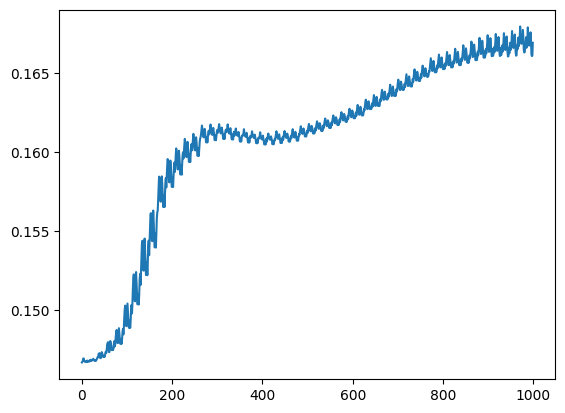

T 2000 Loss 0.19868792094669097 BestLoss 0.1466729936264815


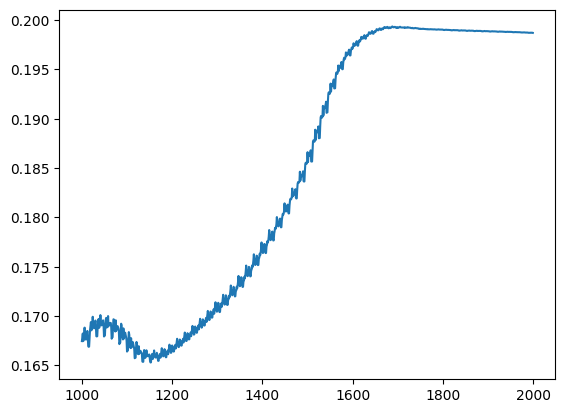

T 3000 Loss 0.18958268353834148 BestLoss 0.1466729936264815


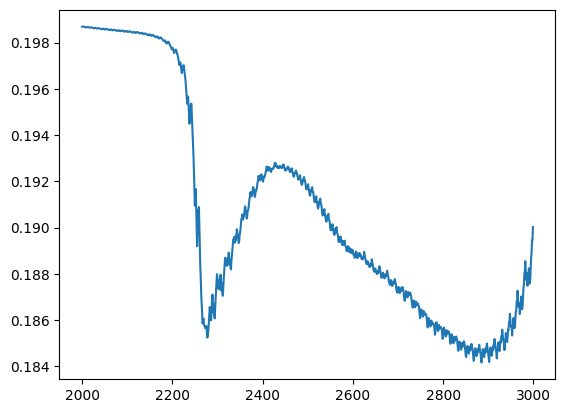

T 4000 Loss 0.1913148825500482 BestLoss 0.1466729936264815


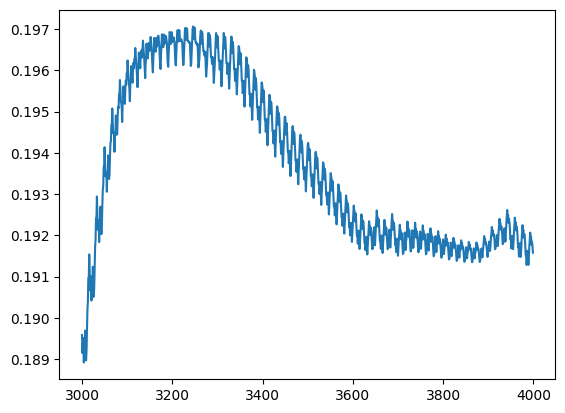

T 5000 Loss 0.17179722076384268 BestLoss 0.1466729936264815


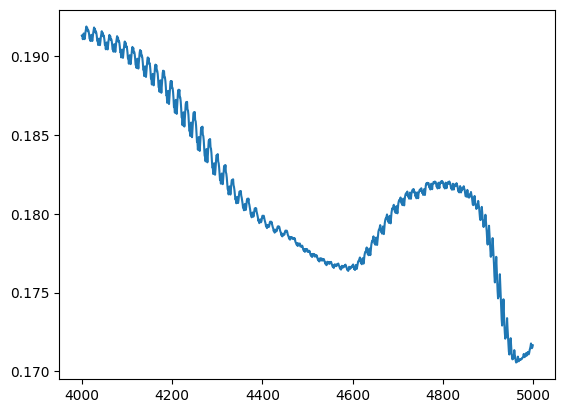

T 6000 Loss 0.20123229611303844 BestLoss 0.1466729936264815


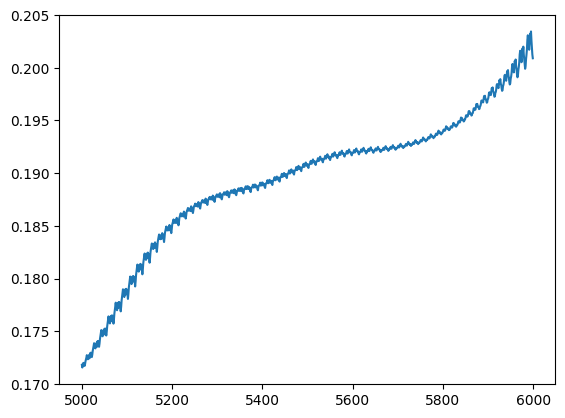

T 7000 Loss 0.19640867271118623 BestLoss 0.1466729936264815


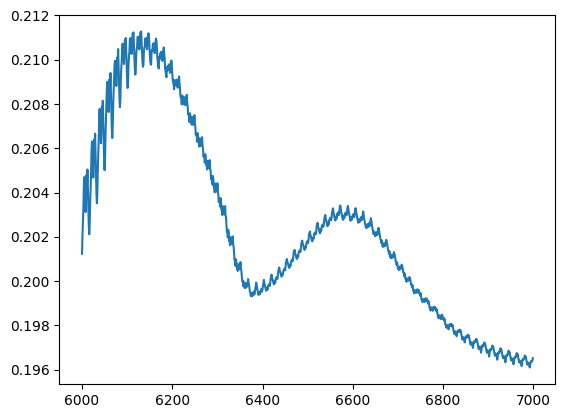

T 8000 Loss 0.19347999461550017 BestLoss 0.1466729936264815


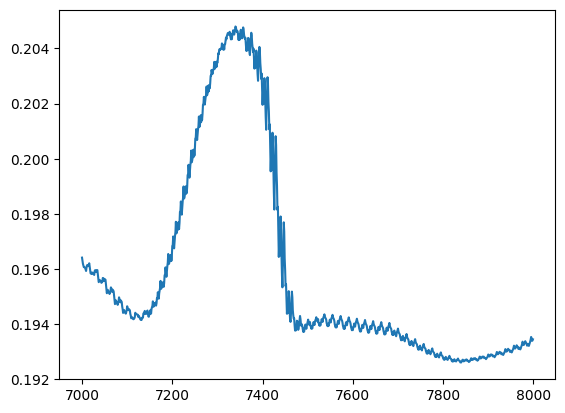

KeyboardInterrupt: 

In [128]:
weights = [];
biasWeights = [];
weights = ReadWeigthFromFile(path);
biasWeights = ReadWeigthFromFile(pathForBias);
perceptron = HebbNetworkGradient([576,36,18,9, 3],biasWeights, weights, eps = 0.1, ruleEps = 0.1)
perceptron.fit(X_train,y_train)

C:\Users\Adminchik\AppData\Local\Temp\ipykernel_10124\3087298450.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


testLoss:  0.34288703472263493


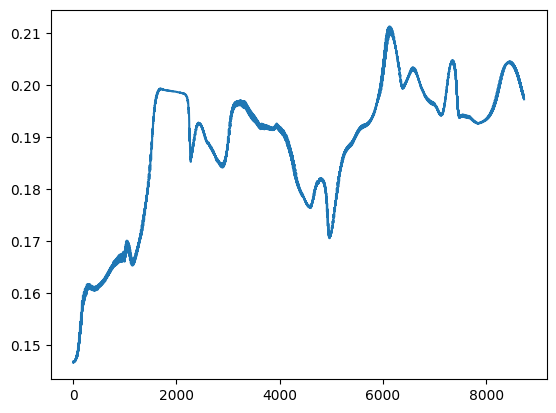

train
[0 0 1] : [0, 0, 1] : [0.2555539718604285, 0.0008982445386934797, 0.9175160228954905]
[1 0 0] : [1, 0, 0] : [0.353067319009256, 0.29562395417897036, 0.025816941087948717]
[0 0 1] : [1, 0, 0] : [0.35306552721548123, 0.2956284129377753, 0.025816933195093022]
[0 1 0] : [1, 0, 0] : [0.3873787062911705, 0.1881783902150244, 0.030264905243907896]
[0 1 0] : [1, 0, 0] : [0.35306554898599923, 0.2956283589100613, 0.02581693327515323]
[0 1 0] : [0, 1, 0] : [0.27256959210646886, 0.5321294421390586, 0.026082811527180054]
[0 1 0] : [1, 0, 0] : [0.35306548421305445, 0.29562851995147454, 0.025816933005185002]
[1 0 0] : [1, 0, 0] : [0.3264267290162117, 0.2712345786957835, 0.03677868616643929]
[1 0 0] : [0, 1, 0] : [0.30378514458034384, 0.428135453040309, 0.02629047309513787]
[1 0 0] : [1, 0, 0] : [0.35306549503174967, 0.2956284927380329, 0.025816933084242728]
[1 0 0] : [1, 0, 0] : [0.38932956891167597, 0.1943807001912183, 0.02879499880405993]
[0 0 1] : [1, 0, 0] : [0.3892527864768702, 0.1984377937

In [137]:
print("testLoss: ",perceptron.CalculateLoss(X_test, y_test))
perceptron.T = int(perceptron.T)
plt.plot(range(1,perceptron.T+1), perceptron.L[:perceptron.T])
plt.show()
print("train")
for i in range(len(X_train)):
  print(y_train[i],":",
        perceptron.predict(X_train[i]),
        ":",
        perceptron.feedforward(X_train[i]))


In [127]:
SaveWeigthsInFile(path, perceptron)
SaveBiasWeightsInFile(pathForBias, perceptron)

In [130]:
weights = ReadWeigthFromFile(path);
biasWeights = ReadWeigthFromFile(pathForBias);
perceptron2 = HebbNetworkGradient([576,36,18,9, 3],biasWeights, weights, eps = 0.1, ruleEps = 0.1)

1
2
3
4


In [136]:
print("testLoss: ",perceptron2.CalculateLoss(X_test, y_test))
print("trainLoss: ",perceptron2.CalculateLoss(X_train, y_train))
print("train")
a = 0
for i in range(len(X_train)):
  y_p = perceptron2.predict(X_train[i])
  y_e = y_train[i]
  
  print(y_train[i],":",
        y_p,
        ":",
        perceptron2.feedforward(X_train[i])
        , ":", y_p == y_e)
  if all(y_p == y_e):
    a +=1

print( a, "/", len(X_train))

testLoss:  0.21072022678249513
trainLoss:  0.1466729936264815
train
[0 0 1] : [0, 0, 1] : [0.3162773830510499, 0.0017074252253126935, 0.9786826505254357] : [ True  True  True]
[1 0 0] : [0, 1, 0] : [0.34456211496602906, 0.6344009693971787, 0.10495430433537543] : [False False  True]
[0 0 1] : [0, 1, 0] : [0.3630395091268127, 0.5842208649837893, 0.10599568177811503] : [ True False False]
[0 1 0] : [1, 0, 0] : [0.4554357779423085, 0.30466988879186696, 0.12522590638113343] : [False False  True]
[0 1 0] : [0, 1, 0] : [0.3607708313476565, 0.5904929725234161, 0.10584893030172221] : [ True  True  True]
[0 1 0] : [0, 1, 0] : [0.06284060304819065, 0.9974302740729812, 0.07903551271840775] : [ True  True  True]
[0 1 0] : [0, 1, 0] : [0.3606504965216625, 0.5908253651040907, 0.10584112778458712] : [ True  True  True]
[1 0 0] : [1, 0, 0] : [0.4429870363937068, 0.20783343388759642, 0.19464449312863763] : [ True  True  True]
[1 0 0] : [1, 0, 0] : [0.44311310810374427, 0.2057162337177402, 0.196126749489

C:\Users\Adminchik\AppData\Local\Temp\ipykernel_10124\3087298450.py:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
